In [4]:
!open .

## get company list

In [63]:
import pandas as pd
import requests
import bs4

def request_price_list(company_code, timeframe, count):
    request_code = company_code
    if request_code.startswith('A'):
        request_code = request_code.replace('A','')
    url = 'https://fchart.stock.naver.com/sise.nhn?requestType=0'
    price_url = url + '&symbol=' + request_code + '&timeframe=' + timeframe + '&count=' + str(count)
    price_data = requests.get(price_url)
    price_data_bs = bs4.BeautifulSoup(price_data.text, 'lxml')
    item_list = price_data_bs.find_all('item')
    
    date_list = []
    price_list = []
    for item in item_list:
        temp_data = item['data']
        datas = temp_data.split('|')
        date_list.append(datas[0])
        price_list.append(datas[4])

    price_list = pd.to_numeric(price_list)
    price_df = pd.DataFrame({company_code:price_list}, index=date_list)
    price_df.index = pd.to_datetime(price_df.index)
    
    return price_df

def get_company_list(kospi = True):
    if kospi == True: 
        file_loc = 'data/kospi.xlsx'
    else:
        file_loc = 'data/kosdaq.xlsx'

    company = pd.read_excel(file_loc)
    company.code = company.code.map('{:06d}'.format)
    company = company.set_index(company.columns[0])
    return company

def get_all_company_list():
    kospi = get_company_list(True)
    kosdaq = get_company_list(False)
    kospi['type'] = 'kospi'
    kosdaq['type'] = 'kosdaq'
    companies = pd.concat([kospi, kosdaq], sort=False)
    return companies

def get_company_code(name, company_df):
    return company_df[company_df['company'] == name].index[0]

companies = get_all_company_list()

## get company code

In [75]:
firm_name = '키움증권'
firm_code = get_company_code(firm_name, companies)
print(firm_code)

039490


In [76]:
price_df = request_price_list(firm_code, 'day', 1000)

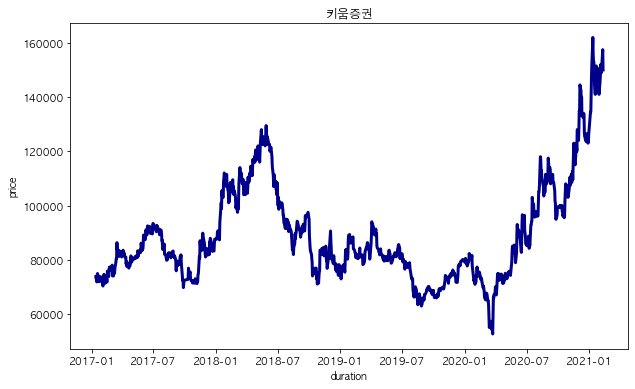

In [77]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# pd.set_option('display.max_colwidth', -1)
rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
plt.plot(price_df.index, price_df[firm_code], color='darkblue',linewidth=3.0)
plt.title(firm_name)
plt.xlabel("duration")
plt.ylabel("price")
# plt.legend(loc='upper right')
# plt.grid()
plt.show() 